In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn 
import sklearn

In [2]:
df=pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.shape

(70000, 13)

In [5]:
df['cardio'].value_counts() #0=disease nei, 1=disease ache

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: ylabel='count'>

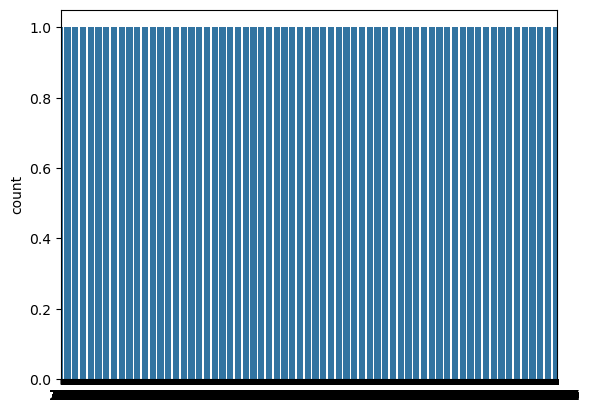

In [6]:
seaborn.countplot(df['cardio'])

In [7]:
df.isnull().values.any() #null thakle true, null na thakle false

False

In [8]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

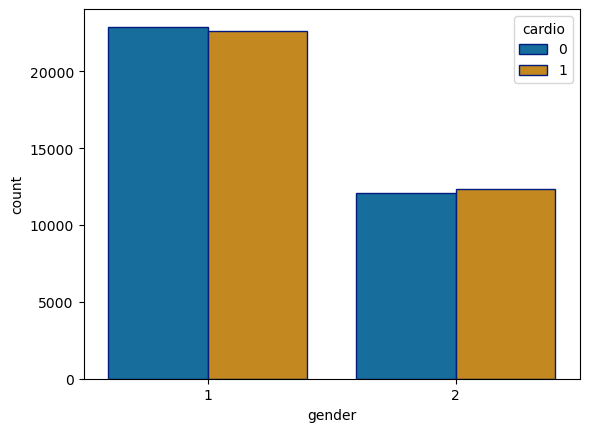

In [9]:
seaborn.countplot(
    x='gender',
    hue='cardio',
    data=df,
    palette='colorblind',
    edgecolor=seaborn.color_palette('dark', n_colors=1)[0]  # ✅ Fixed
)
plt.show()

F:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


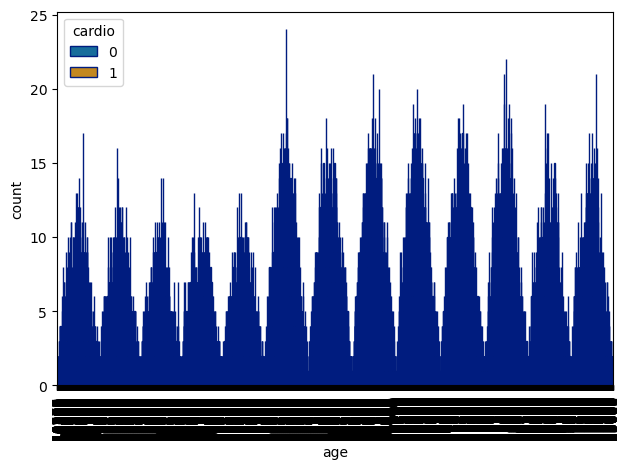

In [10]:
seaborn.countplot(
    x='age',
    hue='cardio',
    data=df,
    palette='colorblind',
    edgecolor=seaborn.color_palette('dark', n_colors=1)[0]  # ✅ শুধুমাত্র প্রথম রঙটি ব্যবহার করা হচ্ছে
)
plt.xticks(rotation=90)  # যদি age অনেক unique হয়, এটি helpful
plt.tight_layout()
plt.show()

In [11]:
df['yr']=(df['age']/365).round(0) 
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

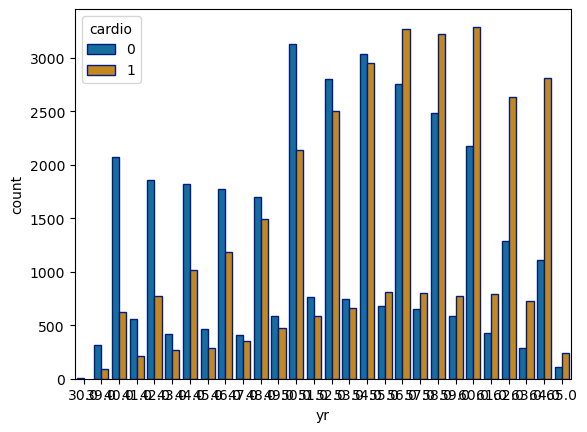

In [12]:
seaborn.countplot(
    x='yr',
    hue='cardio',
    data=df,
    palette='colorblind',
    edgecolor=seaborn.color_palette('dark', n_colors=1)[0]  # ✅ শুধু প্রথম রংটি নিন
)
plt.show()

In [13]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [14]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [15]:
df=df.drop(['yr'],axis=1)

In [16]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
df=df.drop(['id'],axis=1)

In [19]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [20]:
x = df.iloc[:, :-1]  # ✅ শেষ column বাদ

In [21]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [22]:
y = df.iloc[:,11]

In [23]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [35]:
from sklearn.feature_selection import SelectKBest

In [36]:
from sklearn.feature_selection import f_classif

In [39]:
FIT_FEATURES=SelectKBest(score_func=f_classif)

In [40]:
FIT_FEATURES.fit(x,y)

SelectKBest()

In [46]:
SCORE_COL=pd.DataFrame(FIT_FEATURES.scores_,columns=['score value'])

In [47]:
SCORE_COL

,score value
0,4209.007957
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [44]:
name_COL=pd.DataFrame(x.columns)

In [45]:
name_COL

,0
0,age
1,gender
2,height
3,weight
4,ap_hi
5,ap_lo
6,cholesterol
7,gluc
8,smoke
9,alco


In [49]:
top_features=pd.concat([name_COL,SCORE_COL],axis=1)

In [50]:
top_features

,0,score value
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [52]:
top_features.nlargest(8,'score value')

,0,score value
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541


# **Feature Importance**

In [60]:
from sklearn.ensemble import ExtraTreesClassifier


In [61]:
model=ExtraTreesClassifier()

In [62]:
model.fit(x,y)

ExtraTreesClassifier()

In [63]:
model.feature_importances_

array([0.28750823, 0.00552729, 0.17004177, 0.18038349, 0.17932797,
       0.10825069, 0.04524753, 0.0111366 , 0.00393879, 0.00397443,
       0.0046632 ])

In [64]:
top=pd.Series(model.feature_importances_,index=x.columns)

In [65]:
top

age            0.287508
gender         0.005527
height         0.170042
weight         0.180383
ap_hi          0.179328
ap_lo          0.108251
cholesterol    0.045248
gluc           0.011137
smoke          0.003939
alco           0.003974
active         0.004663
dtype: float64

In [66]:
top.nlargest(10)

age            0.287508
weight         0.180383
ap_hi          0.179328
height         0.170042
ap_lo          0.108251
cholesterol    0.045248
gluc           0.011137
gender         0.005527
active         0.004663
alco           0.003974
dtype: float64

<Axes: >

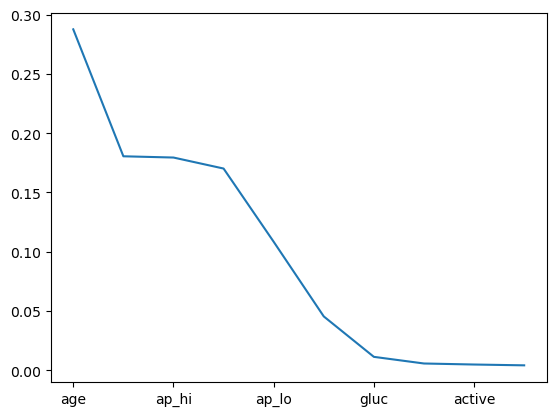

In [67]:
top.nlargest(10).plot()

<Axes: >

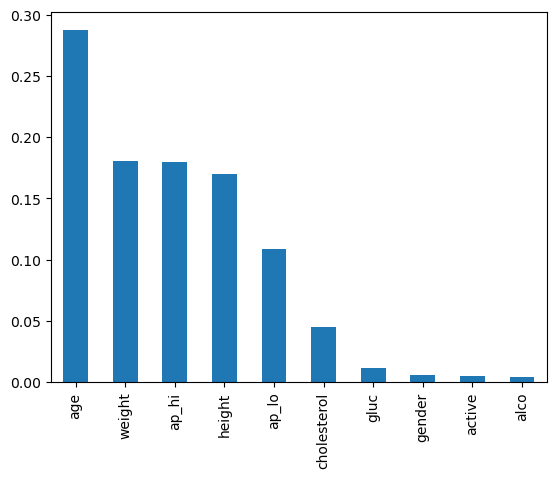

In [68]:
top.nlargest(10).plot(kind='bar')

<Axes: >

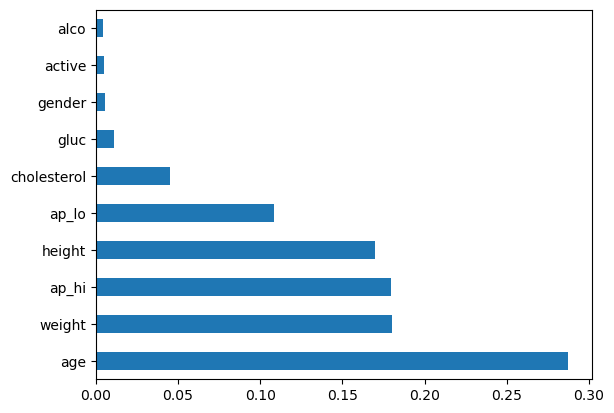

In [69]:
top.nlargest(10).plot(kind='barh') #h=horizontal

<Axes: ylabel='Frequency'>

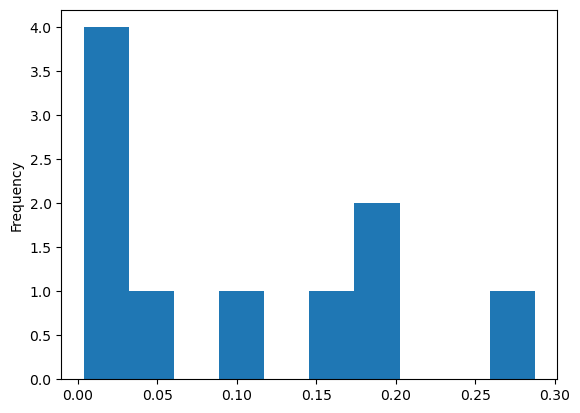

In [71]:
top.nlargest(10).plot(kind='hist') #histogram

<Axes: >

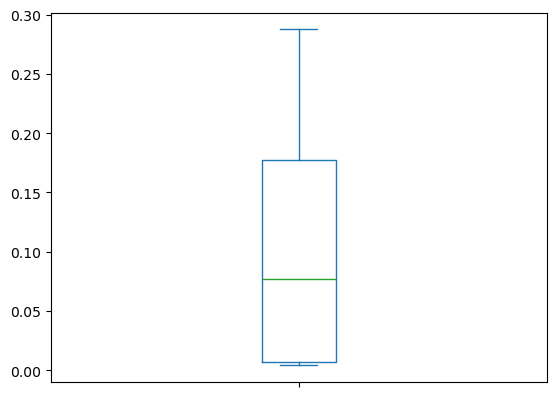

In [72]:
top.nlargest(10).plot(kind='box') 

<Axes: >

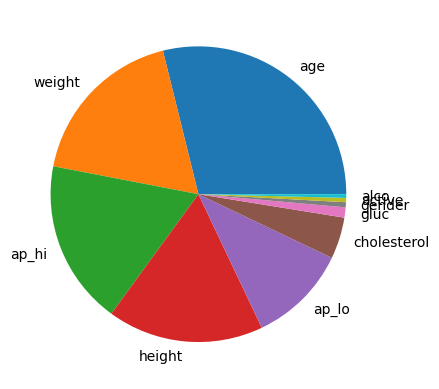

In [73]:
top.nlargest(10).plot(kind='pie') 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [55]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
Rclf=RandomForestClassifier()

In [58]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [30]:
Rclf.score(xtest,ytest)

0.7169047619047619

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf=DecisionTreeClassifier()

In [33]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
clf.score(xtest,ytest)

0.634